# Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

19.081593436427795 118.79280006186042
-24.22944206474827 -152.10238455913498
39.695409818448866 172.0581128967085
-85.57407985218393 136.82591462793334
-60.40757322824784 -65.55358855699713
15.816747304382375 -8.984783689407664
39.67561194045206 -19.072432305828983
10.177872976921932 -105.14381405045117
-74.1580600017937 -50.857067033888285
23.420022603080938 -63.005665725462805
-56.28113197501754 -17.962395786870957
-40.56993596371574 135.5640212400046
-43.17869315819571 135.2403786006692
71.49098891201362 -1.084588376628318
-3.2958159582866955 8.283894306058784
2.2584563111123543 110.93352691984194
-28.10725135024704 84.43041790044691
46.27273293217638 -172.44270403897582
-38.583234307765935 -165.7438728276141
-46.83105777481725 77.68746585622483
20.51053977300083 35.913390072283505
71.44278459120812 0.9931836368146207
61.334567058384295 -108.9325267766085
-67.32898206172122 -79.64379772385067
-43.64955870860031 -135.36169780636789
6.241990596265708 -5.602084878453638
-85.52387011828

# CitiPy Module to get the nearest cities based on the coordinates

In [16]:
from citipy import citipy

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

# Getting the City Weather Data

In [18]:
#Import dependencies
import requests

# Import the API key.
from config import weather_api_key

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
#Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# NEVER PRINT THE URL!!! 
## The API Key is unique and is attached to my card number.

# I only have 60 call per minute, that´s why the counter is up to 50 plus one minute to sleep the prgramm and don´t keep running, because they will charge the bill to my card!!!

In [21]:
#Final code:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | davila
Processing Record 2 of Set 1 | avera
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | nioro
Processing Record 7 of Set 1 | vila franca do campo
Processing Record 8 of Set 1 | ixtapa
Processing Record 9 of Set 1 | the valley
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | gamba
Processing Record 15 of Set 1 | sibu
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | sinkat
City not found. Skipping...
Processing Record 21 of Set 1 | roald
Processing Rec

Processing Record 41 of Set 4 | oistins
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | urumqi
Processing Record 44 of Set 4 | camacha
Processing Record 45 of Set 4 | teixoso
Processing Record 46 of Set 4 | vung tau
Processing Record 47 of Set 4 | beringovskiy
Processing Record 48 of Set 4 | kulhudhuffushi
Processing Record 49 of Set 4 | lakes entrance
Processing Record 50 of Set 4 | bara
Processing Record 1 of Set 5 | touros
Processing Record 2 of Set 5 | gravdal
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | richards bay
Processing Record 5 of Set 5 | khani
Processing Record 6 of Set 5 | lata
Processing Record 7 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 5 | idrinskoye
Processing Record 9 of Set 5 | dembi dolo
Processing Record 10 of Set 5 | pangnirtung
Processing Record 11 of Set 5 | bambous virieux
Processing Record 12 of Set 5 | bell ville
Processing Record 13 of Set 5 

Processing Record 29 of Set 8 | nikolayevka
Processing Record 30 of Set 8 | yaan
Processing Record 31 of Set 8 | college
Processing Record 32 of Set 8 | russell
Processing Record 33 of Set 8 | coahuayana
Processing Record 34 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 35 of Set 8 | nome
Processing Record 36 of Set 8 | batagay-alyta
Processing Record 37 of Set 8 | alice springs
Processing Record 38 of Set 8 | mandalgovi
Processing Record 39 of Set 8 | dhidhdhoo
Processing Record 40 of Set 8 | san anselmo
Processing Record 41 of Set 8 | vaitape
Processing Record 42 of Set 8 | chepareria
Processing Record 43 of Set 8 | utiroa
City not found. Skipping...
Processing Record 44 of Set 8 | dien bien
City not found. Skipping...
Processing Record 45 of Set 8 | havre-saint-pierre
Processing Record 46 of Set 8 | ishigaki
Processing Record 47 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 48 of Set 8 | payo
Processing Record 49 of Set 8 |

Processing Record 16 of Set 12 | labutta
City not found. Skipping...
Processing Record 17 of Set 12 | korla
Processing Record 18 of Set 12 | lagdo
Processing Record 19 of Set 12 | khanpur
Processing Record 20 of Set 12 | anadyr
Processing Record 21 of Set 12 | jackson
Processing Record 22 of Set 12 | dingle
Processing Record 23 of Set 12 | lapi
Processing Record 24 of Set 12 | le port
Processing Record 25 of Set 12 | sulangan
Processing Record 26 of Set 12 | tura
Processing Record 27 of Set 12 | porosozero
Processing Record 28 of Set 12 | amapa
Processing Record 29 of Set 12 | beaupre
Processing Record 30 of Set 12 | chara
Processing Record 31 of Set 12 | tromso
Processing Record 32 of Set 12 | necochea
Processing Record 33 of Set 12 | coari
Processing Record 34 of Set 12 | nouadhibou
Processing Record 35 of Set 12 | sikonge
Processing Record 36 of Set 12 | arkul
Processing Record 37 of Set 12 | kutoarjo
Processing Record 38 of Set 12 | havoysund
Processing Record 39 of Set 12 | jaunje

In [22]:
len(city_data)

559

# Creating the DataFrame of City Weather Data
## Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Davila,78,PH,2022-10-02 02:37:48,67,18.4726,120.5763,89.58,12.35
1,Avera,37,US,2022-10-02 02:37:49,71,33.1940,-82.5271,68.05,6.38
2,Nikolskoye,100,RU,2022-10-02 02:37:49,95,59.7035,30.7861,42.69,2.82
3,Hobart,75,AU,2022-10-02 02:37:06,49,-42.8794,147.3294,63.05,13.80
4,Ushuaia,20,AR,2022-10-02 02:37:50,60,-54.8000,-68.3000,40.66,16.11
5,Nioro,69,GM,2022-10-02 02:37:50,95,13.3500,-15.7500,74.86,4.56
6,Vila Franca Do Campo,97,PT,2022-10-02 02:37:50,83,37.7167,-25.4333,73.20,11.25
7,Ixtapa,100,MX,2022-10-02 02:37:51,100,20.7000,-105.2000,77.23,4.61
8,The Valley,100,AI,2022-10-02 02:37:51,80,18.2170,-63.0578,82.26,14.38
9,Arraial Do Cabo,30,BR,2022-10-02 02:37:52,87,-22.9661,-42.0278,67.77,17.34


In [24]:
#Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df [new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Davila,PH,2022-10-02 02:37:48,18.4726,120.5763,89.58,67,78,12.35
1,Avera,US,2022-10-02 02:37:49,33.1940,-82.5271,68.05,71,37,6.38
2,Nikolskoye,RU,2022-10-02 02:37:49,59.7035,30.7861,42.69,95,100,2.82
3,Hobart,AU,2022-10-02 02:37:06,-42.8794,147.3294,63.05,49,75,13.80
4,Ushuaia,AR,2022-10-02 02:37:50,-54.8000,-68.3000,40.66,60,20,16.11
5,Nioro,GM,2022-10-02 02:37:50,13.3500,-15.7500,74.86,95,69,4.56
6,Vila Franca Do Campo,PT,2022-10-02 02:37:50,37.7167,-25.4333,73.20,83,97,11.25
7,Ixtapa,MX,2022-10-02 02:37:51,20.7000,-105.2000,77.23,100,100,4.61
8,The Valley,AI,2022-10-02 02:37:51,18.2170,-63.0578,82.26,80,100,14.38
9,Arraial Do Cabo,BR,2022-10-02 02:37:52,-22.9661,-42.0278,67.77,87,30,17.34


In [25]:
# Create an output file to save the DataFrame as a CSV

# Create the output file (CSV).We already create a new folder named "weather_data" to save the file
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

##3The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

##3 Remember that we dont want to save the file where we save our UNIQUE API KEY, that has our card info!!!

##3We don't want the file containing the API key to be exposed to the public on GitHub, as this would mean anyone could copy and use our API key, possibly causing us to incur charges.

# Plotting the Data

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

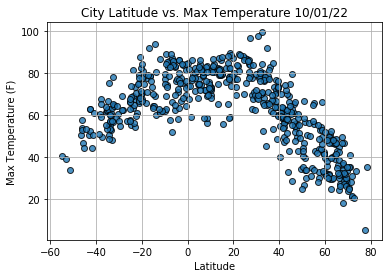

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

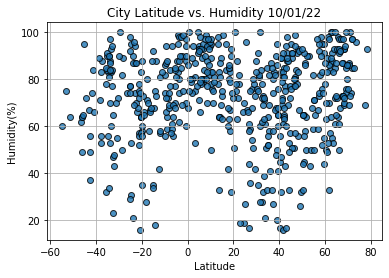

In [30]:
# Build the scatter plot for latitude vs.humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

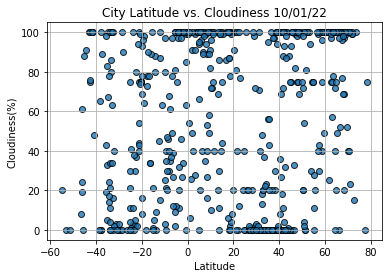

In [32]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

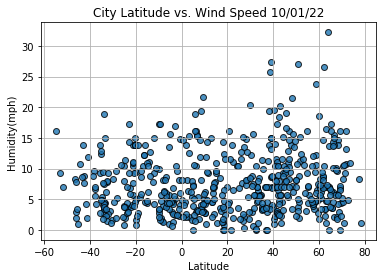

In [33]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Humidity(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()